Filename : first_attempt.ipynb <br>
Date Created: 18/08/24 <br>
Author: Arjun P <br>

things to learn 
- covarience matrix
- singular value decompoistion

### Import

In [5]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir_path = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir_path,"d1.jpg")

file_path

# Load the image
image = Image.open(file_path).convert('L')  # Convert to grayscale
image_data = np.asarray(image)

In [6]:
print(image.height)

5304


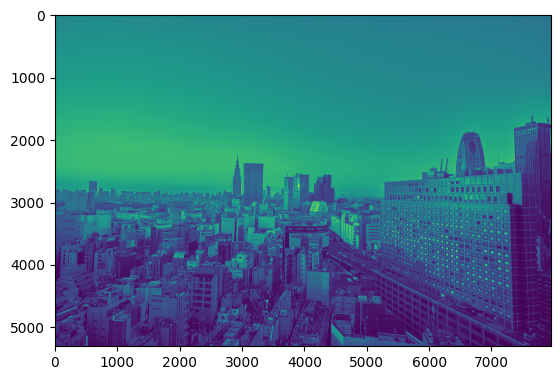

In [7]:
plt.imshow(image_data)

In [4]:
image_data

array([[118, 117, 116, ...,  97,  97,  97],
       [118, 117, 116, ...,  97,  97,  97],
       [117, 116, 115, ...,  97,  97,  97],
       ...,
       [  1,   2,   3, ...,   4,   4,   4],
       [  1,   2,   3, ...,   4,   4,   4],
       [  2,   1,   0, ...,   4,   4,   4]], dtype=uint8)

In [5]:
flat_image = image_data.flatten()
len(flat_image)

42177408

In [6]:
np.mean(flat_image,axis=0)

96.48292531395006

In [7]:
mean_centered_data = image_data - np.mean(image_data,axis=0)
print(mean_centered_data)
np.mean(mean_centered_data)

[[ 20.32767722  19.09841629  17.82390649 ...  31.72737557  31.66534691
   31.87405732]
 [ 20.32767722  19.09841629  17.82390649 ...  31.72737557  31.66534691
   31.87405732]
 [ 19.32767722  18.09841629  16.82390649 ...  31.72737557  31.66534691
   31.87405732]
 ...
 [-96.67232278 -95.90158371 -95.17609351 ... -61.27262443 -61.33465309
  -61.12594268]
 [-96.67232278 -95.90158371 -95.17609351 ... -61.27262443 -61.33465309
  -61.12594268]
 [-95.67232278 -96.90158371 -98.17609351 ... -61.27262443 -61.33465309
  -61.12594268]]


4.477490296882484e-14

In [41]:
cov_matrix = np.cov(mean_centered_data.T)
cov_matrix

array([[3438.09324854, 3423.76163539, 3395.61456733, ..., 2613.05389803,
        2597.69274506, 2561.20854014],
       [3423.76163539, 3424.08950155, 3407.16649459, ..., 2608.31818027,
        2594.79873447, 2559.70238395],
       [3395.61456733, 3407.16649459, 3408.66934351, ..., 2594.31177989,
        2584.16866566, 2552.89541194],
       ...,
       [2613.05389803, 2608.31818027, 2594.31177989, ..., 3208.55059119,
        3107.7056556 , 2938.19156833],
       [2597.69274506, 2594.79873447, 2584.16866566, ..., 3107.7056556 ,
        3142.67980214, 3045.90429035],
       [2561.20854014, 2559.70238395, 2552.89541194, ..., 2938.19156833,
        3045.90429035, 3095.47876113]])

In [8]:
len(cov_matrix)

NameError: name 'cov_matrix' is not defined

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


: 

In [ ]:
eigenvalues[7951]

IndexError: index 7951 is out of bounds for axis 0 with size 5304

In [ ]:
len(eigenvalues)
eigenvectors

array([[ 0.01373088,  0.01663002, -0.00489494, ...,  0.00307451,
        -0.01056553, -0.00616679],
       [ 0.01373088, -0.01860701, -0.00747445, ...,  0.00312172,
        -0.01056288, -0.00615662],
       [ 0.01373088, -0.01047992,  0.01090342, ...,  0.00309939,
        -0.01054974, -0.00614364],
       ...,
       [ 0.01373088,  0.0024095 , -0.00169697, ...,  0.01495532,
         0.00496506, -0.00623913],
       [ 0.01373088, -0.00256503,  0.00051335, ...,  0.01479698,
         0.00497689, -0.0063904 ],
       [ 0.01373088,  0.00193782,  0.00117513, ...,  0.01442279,
         0.0050405 , -0.00651566]])

In [ ]:
val = eigenvectors[:,[3,4,5]]
print(val)

[[-0.00241253  0.00610524  0.0068022 ]
 [ 0.00671958 -0.01315527 -0.00874901]
 [-0.00842488  0.0066628   0.00398022]
 ...
 [ 0.00326888 -0.00212223  0.00158254]
 [-0.00021635  0.00155898 -0.00192815]
 [-0.00060868 -0.00041441  0.00144434]]


In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1] #sort decending
top_k_eigenvectors = eigenvectors[:, sorted_indices[:10]]

In [ ]:
len(top_k_eigenvectors)

5304

In [ ]:
image_data.shape

(5304, 7952)

In [ ]:
compressed_data = np.dot(mean_centered_data,top_k_eigenvectors)
reconstructed_data = np.dot(compressed_data, top_k_eigenvectors.T) 

print(image.height,image.width)
print(mean_centered_data.shape)
print(top_k_eigenvectors.shape)
print(compressed_data.shape)
print(reconstructed_data.shape)

ValueError: shapes (5304,7952) and (5304,10) not aligned: 7952 (dim 1) != 5304 (dim 0)

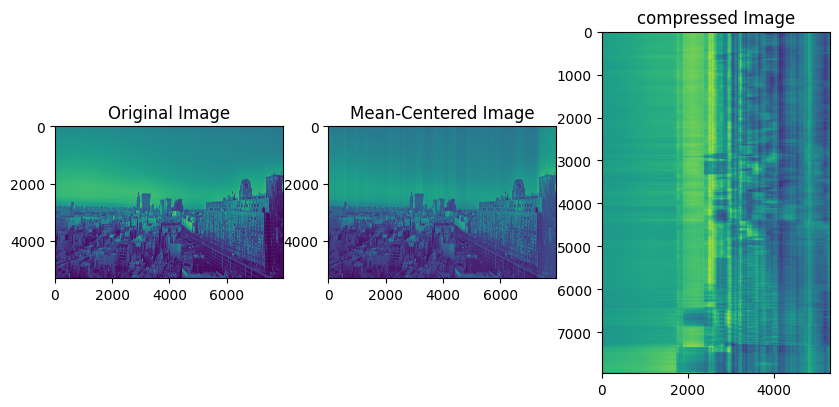

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(image_data)
axs[0].set_title('Original Image')

axs[1].imshow(mean_centered_data)
axs[1].set_title('Mean-Centered Image')

axs[2].imshow(reconstructed_data)
axs[2].set_title('compressed Image')

# axs[3].imshow(reconstructed_data + np.mean(image_data))
# axs[3].set_title("compressed data with mean")
plt.show()


### Testing covarience

In [1]:
import numpy as np

arr = np.array([[3,2],[7,4]])

print(arr)

np.cov(arr)

[[3 2]
 [7 4]]


array([[0.5, 1.5],
       [1.5, 4.5]])

In [2]:
arr = np.array([[-1,1],[0,0],[1,-1]])

n = len(arr)
print(n)
print(arr.T.shape)
print(arr.shape)

print(np.cov(arr.T))
norm = 1/(n-1)
print(norm)
cov_m = np.dot(arr.T,arr)
print(cov_m)
cov = norm*cov_m
cov

3
(2, 3)
(3, 2)
[[ 1. -1.]
 [-1.  1.]]
0.5
[[ 2 -2]
 [-2  2]]


array([[ 1., -1.],
       [-1.,  1.]])

In [3]:
cov = np.array([[4,2],[2,3]])

print(cov)
c,v = np.linalg.eig(cov)
print(c)
print(v)

top_k = v[:,0]

top_k

[[4 2]
 [2 3]]
[5.56155281 1.43844719]
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]


array([0.78820544, 0.61541221])

In [4]:
print(np.dot(cov,top_k))

print(c[0]*top_k)

[4.38364617 3.4226475 ]
[4.38364617 3.4226475 ]


In [20]:
simple_matrix = image_data[0:20,0:40]

## Calculating variance of dataset

In [42]:
flat_matrix = simple_matrix.flatten()
mean = flat_matrix.mean()

total = 0
for num in flat_matrix:
    total += (num - mean)**2

variance = (total/len(flat_matrix))

print(variance)
print(flat_matrix.var())

1.3832437500000023
1.38324375


In [31]:
simple_matrix.T

array([[118, 118, 117, 116, 115, 114, 114, 114, 116, 116, 116, 116, 116,
        116, 116, 116, 114, 115, 115, 116],
       [117, 117, 116, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116,
        116, 116, 116, 114, 115, 115, 116],
       [116, 116, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116,
        116, 116, 116, 114, 115, 115, 116],
       [115, 115, 115, 115, 115, 116, 116, 117, 116, 116, 116, 116, 116,
        116, 116, 116, 115, 115, 115, 115],
       [114, 114, 114, 114, 115, 116, 116, 117, 116, 116, 116, 116, 116,
        116, 116, 116, 115, 115, 115, 115],
       [114, 114, 114, 114, 115, 115, 116, 116, 116, 116, 116, 116, 116,
        116, 116, 116, 116, 115, 115, 114],
       [115, 115, 114, 114, 114, 115, 115, 116, 116, 116, 116, 116, 116,
        116, 116, 116, 116, 115, 115, 114],
       [115, 115, 115, 114, 114, 114, 115, 115, 116, 116, 116, 116, 116,
        116, 116, 116, 116, 115, 115, 114],
       [116, 116, 116, 117, 117, 116, 116, 116, 114, 115, 115, 1